In [58]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import pyDR
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [7]:
%matplotlib notebook

In [4]:
plt.rcParams['font.size']=14

In [36]:
dt=.001
p=3e-3
tc=dt/p
t=np.arange(1e6)*dt
state=np.cumsum(np.random.binomial(1,p=p,size=t.size))%2

<IPython.core.display.Javascript object>


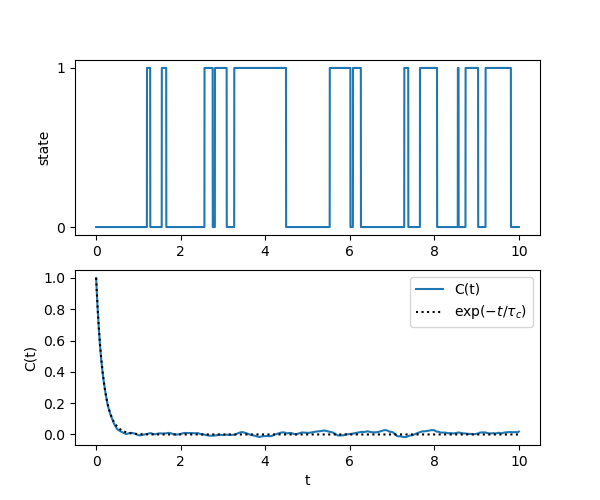

In [42]:
fig,ax=plt.subplots(2,1,figsize=[6,5])
ax[0].plot(t[:10000],state[:10000])


s=np.zeros(state.size*2)
s[:state.size]=state
Ct=np.fft.ifft(np.fft.fft(s)*np.fft.fft(s).conj())[:state.size].real
Ct/=np.arange(state.size,0,-1)
Ct-=state.mean()**2
Ct/=state.std()**2

ax[1].plot(t[:10000],Ct[:10000])
ax[1].plot(t[:10000],np.exp(-2*t[:10000]/tc),linestyle=':',color='black')

ax[0].set_ylabel('state')
ax[0].set_yticks([0,1])
ax[1].set_xlabel('t')
ax[1].set_ylabel('C(t)')
ax[1].legend(('C(t)',r'$\exp(-t/\tau_c)$'))

<IPython.core.display.Javascript object>


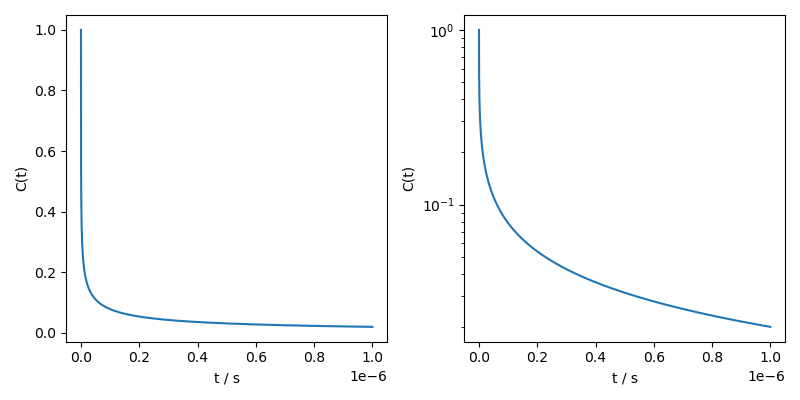

In [179]:
z=np.linspace(-14,-3,500)
z0=-9
sigma=1.5
dist=np.exp(-(z-z0)**2/(2*sigma**2))
dist/=dist.sum()
zavg=1/((1/z)*dist).sum()

t=np.concatenate([[0],np.logspace(-12,-6,500)])
I=np.sum([np.exp(-t/10**z0)*d for z0,d in zip(z,dist)],axis=0)

fig,ax=plt.subplots(1,2,figsize=[8,4])
ax[0].plot(t,I)
# ax[0].plot(t,np.exp(-t/10**zavg))
ax[1].semilogy(t,I)
ax[0].set_xlabel('t / s')
ax[1].set_xlabel('t / s')
ax[0].set_ylabel('C(t)')
ax[1].set_ylabel('C(t)')
fig.tight_layout()
# ax[1].semilogy(t,np.exp(-t/10**zavg))

In [180]:
Rstd=np.ones([1,*t.shape])
Rstd[0,0]=1e-6
data=pyDR.Data(R=np.atleast_2d(I),Rstd=Rstd,sens=pyDR.Sens.MD(t=t*1e9))
data.detect.r_auto(8,Normalization='I')

In [181]:
fit=data.fit()

<IPython.core.display.Javascript object>


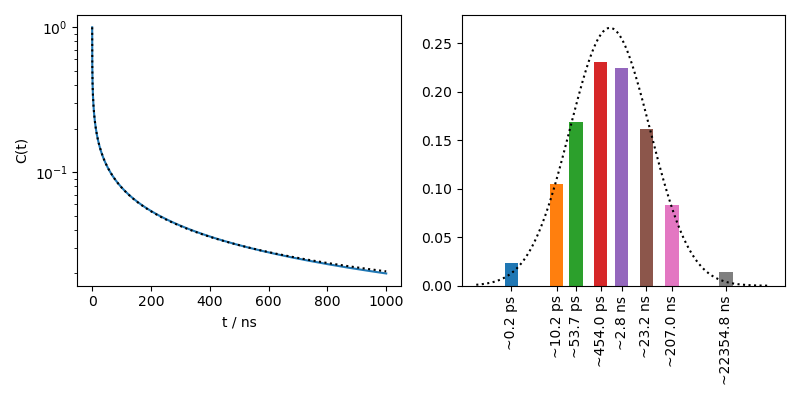

In [186]:
fig,ax=plt.subplots(1,2,figsize=[8,4])
cmap=plt.get_cmap('tab10')
for k,R in enumerate(fit.R[0]):
    ax[1].bar(fit.sens.info['z0'][k],R,color=cmap(k),label=None,width=.5)
ax[1].set_xticks(fit.sens.info['z0'])
lbl=[f'~{10**z0*1e12:.1f} ps' if z0<-9 else f'~{10**z0*1e9:.1f} ns' for z0 in fit.sens.info['z0']]
ax[1].set_xticklabels(lbl,rotation=90)
ax[1].plot(z,dist/(z[1]-z[0]),color='black',linestyle=':')

ax[0].semilogy(t*1e9,I)
ax[0].semilogy(t*1e9,fit.Rc[0],linestyle=':',color='black')
ax[0].set_xlabel('t / ns')
ax[0].set_ylabel('C(t)')
fig.tight_layout()

<IPython.core.display.Javascript object>


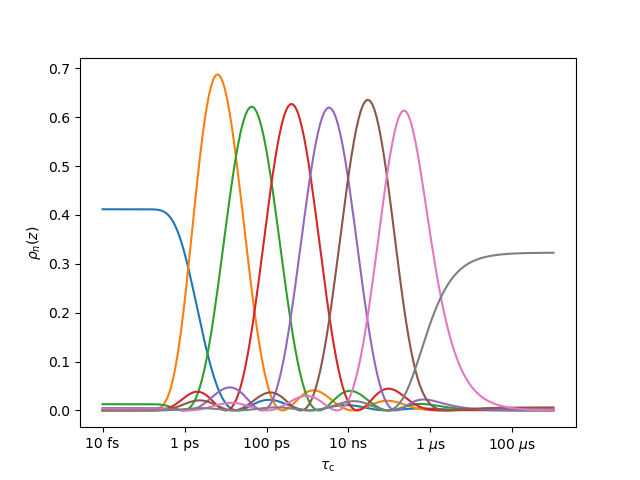

In [184]:
fit.sens.plot_rhoz()